In [45]:
# Calculo cientifico y vectorial para python
import numpy as np
# Librerias para graficar
from matplotlib import pyplot
# Modulo de optimización de scipy
from scipy import optimize
import pandas as pd

In [46]:
# cargar a una variable el dataset

data = pd.read_csv("emails_pre.csv")
data

,0,0.1,1,0.2,0.3,0.4,2,0.5,0.6,0.7,...,0.2957,0.2958,0.2959,0.2960,0.2961,0.2962,0.2963,0.2964,0.2965,0.2966
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,6,12,3,3,1,55,0,14,11,...,0,0,0,0,0,0,0,0,0,0
2,0,2,12,0,2,0,30,1,5,2,...,0,0,0,0,0,0,0,0,0,0
3,4,6,20,0,5,2,54,1,10,2,...,0,0,0,0,0,0,0,0,0,0
4,6,6,9,2,4,2,51,0,4,10,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,2,0,0,0,13,0,1,5,...,0,0,0,0,0,0,0,0,0,0
9996,35,26,8,21,12,24,252,6,0,77,...,0,0,0,0,0,0,0,5,0,1
9997,2,2,1,0,0,0,11,0,0,2,...,0,0,0,0,0,0,0,0,0,0
9998,20,12,2,4,6,2,85,4,1,20,...,0,0,0,0,0,0,0,0,0,0


In [47]:
data = np.loadtxt('emails_pre.csv', delimiter=',')
X_datos, y_datos = data[:, 0:3000], data[:, 3000]
print(X_datos)
print(y_datos)

[[ 0.      0.1     1.     ...  0.2963  0.2964  0.2965]
 [ 0.      0.      0.     ...  0.      0.      0.    ]
 [ 4.      6.     12.     ...  0.      0.      0.    ]
 ...
 [ 2.      2.      1.     ...  0.      0.      0.    ]
 [20.     12.      2.     ...  0.      0.      0.    ]
 [ 1.      1.      2.     ...  0.      0.      0.    ]]
[0. 0. 0. ... 0. 0. 0.]


In [48]:
# funcion para la normalizacion de caracteristicas
def  featureNormalize(X):
    X_norm = X.copy()
    media_norm = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    media_norm = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - media_norm) / sigma
    
    return X_norm, media_norm, sigma

In [49]:
X_norm, media_norm, sigma = featureNormalize(X_datos)

In [50]:
X = X_norm
#X = X_datos
y = y_datos
print(X[5])

[-0.07614694 -0.03338999  0.37065243 ... -0.0261713  -0.42075195
 -0.02896549]


In [51]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1 / (1 + np.exp(-z))

    return g

In [52]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción. 
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [53]:
print(X[5])

[ 1.         -0.07614694 -0.03338999 ... -0.0261713  -0.42075195
 -0.02896549]


In [54]:
# funcion del costo
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    
    return J

In [55]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []
    
    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)
       
        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [-2.21113638e-02 -1.94874030e-04  1.60847111e-05 ... -1.27295463e-04
  8.10939342e-04 -7.56389710e-05]
El costo mejor:  0.6781750329044968


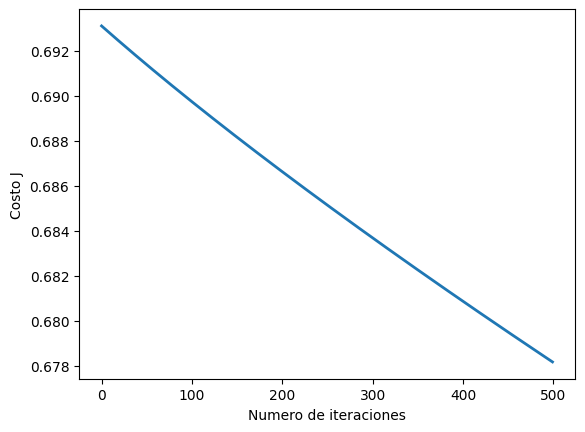

In [56]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.0001
num_iters = 500

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(3001)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))
print('El costo mejor: ', J_history[-1])

In [66]:
# verificar si le va dar un ataque al corazon o no
X_prueba = X[100:101, :].copy()
prueba = sigmoid(np.dot(X_prueba, theta))   # Se debe cambiar esto

print("Email spam, se predice una probabilidad de acierto de: {:.3f}%".format(int(prueba)))

Email spam, se predice una probabilidad de acierto de: 0.000%


In [62]:
# Se prueba la funcion `costFunction` utilizando dos casos de prueba para theta.
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))
    #epsilon = 1e-8 
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)
    
    return J, grad

In [63]:
# Establecer las opciones para optimize.minimize
options= {'maxfun': 1000}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta_minimze = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))

C:\Users\israe\AppData\Local\Temp\ipykernel_2888\3177260046.py:11: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))


Costo con un valor de theta encontrado por optimize.minimize: 0.217


In [60]:
def predict(theta, X):
    m = X.shape[0] # Numero de ejemplo de entrenamiento
    p = np.zeros(m)
    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [67]:
prob = sigmoid(np.dot(X_prueba, theta_minimze))

print("Email spam, se predice una probabilidad de acierto de: {:.3f}%".format(int(prob)))

# Compute accuracy on our training set
p = predict(theta_minimze, X)
print("Precisión de entrenamiento: {:.2f} %".format(np.mean(p == y) * 100))

Email spam, se predice una probabilidad de acierto de: 0.000%
Precisión de entrenamiento: 95.76 %
